In [57]:
import numpy as np
import pandas as pd

In [58]:
melb_data = pd.read_csv('melb_data.csv', sep=',', decimal='.')


def fix_missing_values(df):

    cols = df.columns
    for col in cols:
        n = df[df[col].isnull()].shape[0]
        if n > 0:
            if df[col].dtype == object:
                #Se marca los nulos con "NO_LABEL"
                df[col] = df[col].fillna('NO_LABEL')

            else:
                #Se crea columna nueva para identificar nulos
                pos = df.columns.get_loc(col)
                df.insert(loc=pos+1, column=col+'_NULL', value=0)
                df.loc[df[col].isnull(), col+'_NULL'] = 1
                #Se rellenan los nulos con la media
                df[col] = df[col].fillna(df[df[col].notnull()][col].mean())
    
    return df

melb_data = fix_missing_values(melb_data)
melb_data

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Landsize,BuildingArea,BuildingArea_NULL,YearBuilt,YearBuilt_NULL,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,...,202.0,151.96765,1,1964.684217,1,Yarra,-37.79960,144.99840,Northern Metropolitan,4019.0
1,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,...,156.0,79.00000,0,1900.000000,0,Yarra,-37.80790,144.99340,Northern Metropolitan,4019.0
2,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,...,134.0,150.00000,0,1900.000000,0,Yarra,-37.80930,144.99440,Northern Metropolitan,4019.0
3,Abbotsford,40 Federation La,3,h,850000.0,PI,Biggin,4/03/2017,2.5,3067.0,...,94.0,151.96765,1,1964.684217,1,Yarra,-37.79690,144.99690,Northern Metropolitan,4019.0
4,Abbotsford,55a Park St,4,h,1600000.0,VB,Nelson,4/06/2016,2.5,3067.0,...,120.0,142.00000,0,2014.000000,0,Yarra,-37.80720,144.99410,Northern Metropolitan,4019.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13575,Wheelers Hill,12 Strada Cr,4,h,1245000.0,S,Barry,26/08/2017,16.7,3150.0,...,652.0,151.96765,1,1981.000000,0,NO_LABEL,-37.90562,145.16761,South-Eastern Metropolitan,7392.0
13576,Williamstown,77 Merrett Dr,3,h,1031000.0,SP,Williams,26/08/2017,6.8,3016.0,...,333.0,133.00000,0,1995.000000,0,NO_LABEL,-37.85927,144.87904,Western Metropolitan,6380.0
13577,Williamstown,83 Power St,3,h,1170000.0,S,Raine,26/08/2017,6.8,3016.0,...,436.0,151.96765,1,1997.000000,0,NO_LABEL,-37.85274,144.88738,Western Metropolitan,6380.0
13578,Williamstown,96 Verdon St,4,h,2500000.0,PI,Sweeney,26/08/2017,6.8,3016.0,...,866.0,157.00000,0,1920.000000,0,NO_LABEL,-37.85908,144.89299,Western Metropolitan,6380.0


In [59]:
worked_data = melb_data.copy()
object_cols = [col for col in worked_data.columns if worked_data[col].dtype == "object"]
for col in object_cols:
    print(f'BEFORE: {col}, {worked_data[col].unique().shape[0]}')
    if worked_data[col].unique().shape[0] > 50:
        worked_data = worked_data.drop(columns=[col])

object_cols = [col for col in worked_data.columns if worked_data[col].dtype == "object"]
for col in object_cols:
    print(f'AFTER: {col}, {worked_data[col].unique().shape[0]}')

worked_data

BEFORE: Suburb, 314
BEFORE: Address, 13378
BEFORE: Type, 3
BEFORE: Method, 5
BEFORE: SellerG, 268
BEFORE: Date, 58
BEFORE: CouncilArea, 34
BEFORE: Regionname, 8
AFTER: Type, 3
AFTER: Method, 5
AFTER: CouncilArea, 34
AFTER: Regionname, 8


,Rooms,Type,Price,Method,Distance,Postcode,Bedroom2,Bathroom,Car,Car_NULL,Landsize,BuildingArea,BuildingArea_NULL,YearBuilt,YearBuilt_NULL,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,2,h,1480000.0,S,2.5,3067.0,2.0,1.0,1.0,0,202.0,151.96765,1,1964.684217,1,Yarra,-37.79960,144.99840,Northern Metropolitan,4019.0
1,2,h,1035000.0,S,2.5,3067.0,2.0,1.0,0.0,0,156.0,79.00000,0,1900.000000,0,Yarra,-37.80790,144.99340,Northern Metropolitan,4019.0
2,3,h,1465000.0,SP,2.5,3067.0,3.0,2.0,0.0,0,134.0,150.00000,0,1900.000000,0,Yarra,-37.80930,144.99440,Northern Metropolitan,4019.0
3,3,h,850000.0,PI,2.5,3067.0,3.0,2.0,1.0,0,94.0,151.96765,1,1964.684217,1,Yarra,-37.79690,144.99690,Northern Metropolitan,4019.0
4,4,h,1600000.0,VB,2.5,3067.0,3.0,1.0,2.0,0,120.0,142.00000,0,2014.000000,0,Yarra,-37.80720,144.99410,Northern Metropolitan,4019.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13575,4,h,1245000.0,S,16.7,3150.0,4.0,2.0,2.0,0,652.0,151.96765,1,1981.000000,0,NO_LABEL,-37.90562,145.16761,South-Eastern Metropolitan,7392.0
13576,3,h,1031000.0,SP,6.8,3016.0,3.0,2.0,2.0,0,333.0,133.00000,0,1995.000000,0,NO_LABEL,-37.85927,144.87904,Western Metropolitan,6380.0
13577,3,h,1170000.0,S,6.8,3016.0,3.0,2.0,4.0,0,436.0,151.96765,1,1997.000000,0,NO_LABEL,-37.85274,144.88738,Western Metropolitan,6380.0
13578,4,h,2500000.0,PI,6.8,3016.0,4.0,1.0,5.0,0,866.0,157.00000,0,1920.000000,0,NO_LABEL,-37.85908,144.89299,Western Metropolitan,6380.0


In [60]:
object_cols = [col for col in worked_data.columns if worked_data[col].dtype == "object"]
worked_data = pd.get_dummies(worked_data, columns=object_cols)

In [75]:
from sklearn.tree import DecisionTreeRegressor
melbourne_features = ['Rooms', 'Bathroom', 'Landsize', 'Lattitude', 'Longtitude']
X = melb_data[melbourne_features]
y = melb_data['Price']


# Define model. Specify a number for random_state to ensure same results each run
melbourne_model = DecisionTreeRegressor(random_state=1)

# Fit model
melbourne_model.fit(X, y)


#Errores
from sklearn.metrics import mean_absolute_error

predicted_home_prices = melbourne_model.predict(X)
print(mean_absolute_error(y, predicted_home_prices))


from sklearn.model_selection import train_test_split

# split data into training and validation data, for both features and target
# The split is based on a random number generator. Supplying a numeric value to
# the random_state argument guarantees we get the same split every time we
# run this script.
train_X, val_X, train_y, val_y = train_test_split(X, y, test_size=0.25, random_state=0)
# Define model
melbourne_model = DecisionTreeRegressor()
# Fit model
melbourne_model.fit(train_X, train_y)

# get predicted prices on validation data
val_predictions = melbourne_model.predict(val_X)
print(mean_absolute_error(val_y, val_predictions))#validacion

1125.1804614629357
248442.5269513991


In [108]:
from sklearn.model_selection import train_test_split

# split data into training and validation data, for both features and target
# The split is based on a random number generator. Supplying a numeric value to
# the random_state argument guarantees we get the same split every time we
# run this script.
X = worked_data.drop(columns=['Price'])
y = worked_data['Price']

train_X, val_X, train_y, val_y = train_test_split(X, y, test_size=0.25, random_state=0)
# Define model
worked_model = DecisionTreeRegressor()
# Fit model
melbourne_model.fit(train_X, train_y)

# get predicted prices on validation data
val_predictions = melbourne_model.predict(val_X)
print(mean_absolute_error(val_y, val_predictions))#validacion

233205.99057437407


In [109]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error

forest_model = RandomForestRegressor(random_state=1, n_estimators=100)
forest_model.fit(train_X, train_y)
melb_preds = forest_model.predict(val_X)
print(mean_absolute_error(val_y, melb_preds))

165398.83290399043


<Axes: xlabel='Importance', ylabel='Feature'>

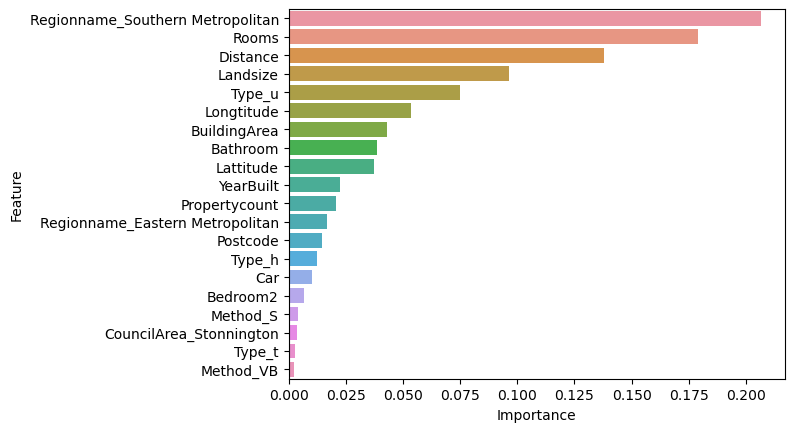

In [123]:
import seaborn as sns
import matplotlib.pyplot as plt

# Obtener la importancia de las características del modelo)
importances = list(zip(train_X.columns, forest_model.feature_importances_))
importances = pd.DataFrame(importances, columns=['Feature', 'Importance'])
importances = importances.sort_values(by='Importance', ascending=False)
importances['Importance'] = importances['Importance'].round(6)

sns.barplot(x='Importance', y='Feature', data=importances.head(20))

In [138]:
X = worked_data[importances['Feature'].head(11)]
y = worked_data['Price']
train_X, val_X, train_y, val_y = train_test_split(X, y, test_size=0.25, random_state=0)

forest_model = RandomForestRegressor(random_state=1, n_estimators=100)
forest_model.fit(train_X, train_y)
melb_preds = forest_model.predict(val_X)
print(mean_absolute_error(val_y, melb_preds))

166863.78523706665


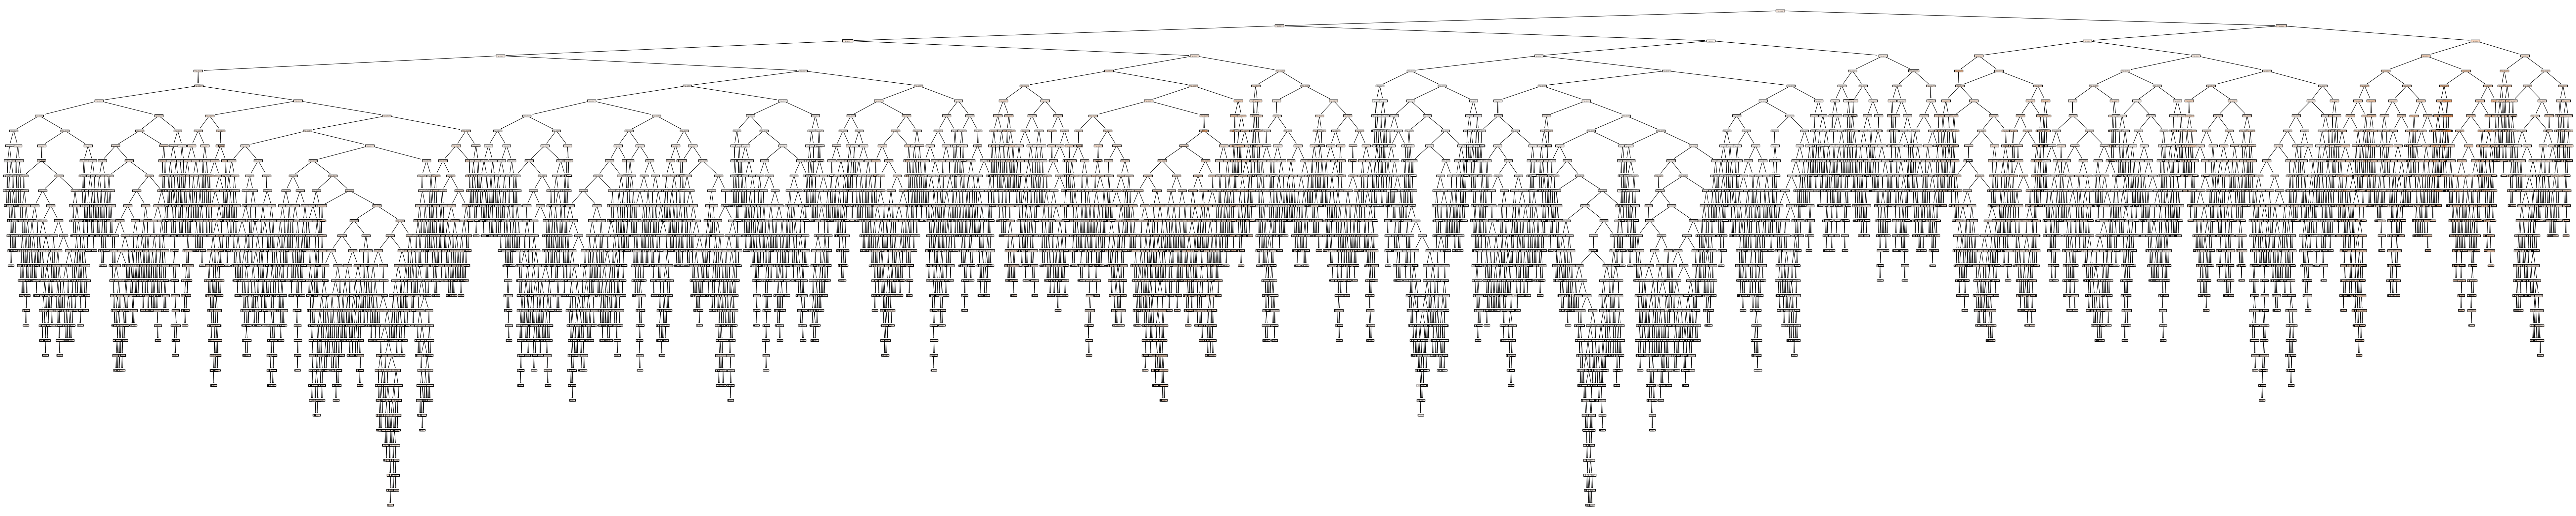

In [139]:
from sklearn import tree
import matplotlib.pyplot as plt

# Extraer un árbol del bosque
tree_to_visualize = forest_model.estimators_[2]  # Por ejemplo, extraemos el primer árbol

# Visualizar el árbol
plt.figure(figsize=(100,20))
tree.plot_tree(tree_to_visualize, feature_names=train_X.columns, filled=True)
plt.show()

In [ ]:
tree.export_text(tree_to_visualize, feature_names=train_X.columns)